# Test Notebook

### Import libraries and magic

In [3]:
import numpy as np
import tensorflow as tf
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

### Load Models

In [5]:
flower_model = tf.keras.models.load_model('flower_classifier.keras')
car_model = tf.keras.models.load_model('car_detector.keras')

## Dataset 1: Flower Species Dataset

In [7]:
# Load Flower Test Dataset

X_test_flower = np.load('flower_species_classification/data_test.npy').reshape(-1, 300, 300, 3) / 255.0
y_test_flower = np.load('flower_species_classification/labels_test.npy')

In [8]:
# Predict Flower Classes

flower_preds = np.argmax(flower_model.predict(X_test_flower), axis=1)
flower_accuracy = np.mean(flower_preds == y_test_flower)
print(f"Flower Classification Test Accuracy: {flower_accuracy}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step
Flower Classification Test Accuracy: 0.1108433734939759


In [9]:
# Load Flower Training History

flower_history = np.load('flower_species_classification/flower_training_history.npy', allow_pickle=True).item()

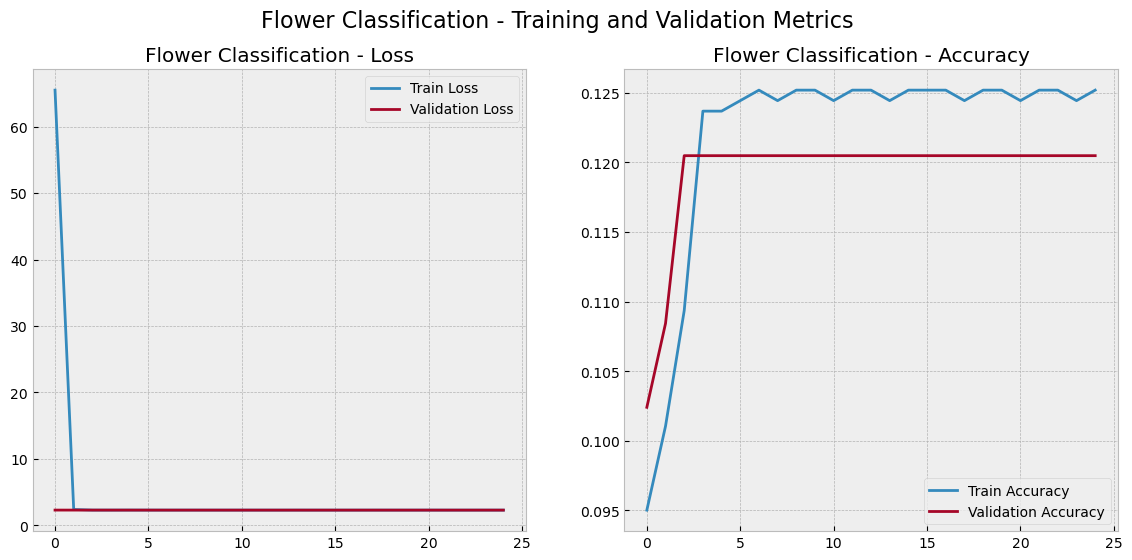

In [10]:
# Plot Training Results

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(flower_history['loss'], label='Train Loss')
plt.plot(flower_history['val_loss'], label='Validation Loss')
plt.title('Flower Classification - Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(flower_history['accuracy'], label='Train Accuracy')
plt.plot(flower_history['val_accuracy'], label='Validation Accuracy')
plt.title('Flower Classification - Accuracy')
plt.legend()
plt.suptitle('Flower Classification - Training and Validation Metrics', fontsize=16)
plt.show()

## Dataset 2: Car Detection Dataset

In [12]:
# Test Dataset

car_test_annotations = pd.read_csv('car_detection_dataset/train_bounding_boxes.csv')

test_image_dir = 'car_detection_dataset/testing_images/'

test_files = [
    'vid_5_30040.jpg', 'vid_5_27500.jpg', 'vid_5_28380.jpg', 'vid_5_26420.jpg', 'vid_5_31160.jpg',
    'vid_5_29840.jpg', 'vid_5_30120.jpg', 'vid_5_27460.jpg', 'vid_5_28020.jpg', 'vid_5_30860.jpg',
    'vid_5_26780.jpg', 'vid_5_29100.jpg', 'vid_5_25100.jpg', 'vid_5_29060.jpg', 'vid_5_28340.jpg',
    'vid_5_26580.jpg', 'vid_5_29880.jpg', 'vid_5_25260.jpg', 'vid_5_31200.jpg', 'vid_5_26740.jpg',
    'vid_5_27660.jpg', 'vid_5_27700.jpg', 'vid_5_31360.jpg', 'vid_5_26620.jpg', 'vid_5_28180.jpg',
    'vid_5_27260.jpg', 'vid_5_30720.jpg', 'vid_5_31600.jpg', 'vid_5_28580.jpg', 'vid_5_27880.jpg',
    'vid_5_27300.jpg', 'vid_5_30640.jpg', 'vid_5_28620.jpg', 'vid_5_26800.jpg', 'vid_5_29500.jpg',
    'vid_5_440.jpg', 'vid_5_27920.jpg', 'vid_5_28420.jpg', 'vid_5_27840.jpg', 'vid_5_28540.jpg',
    'vid_5_26960.jpg', 'vid_5_30680.jpg', 'vid_5_29460.jpg', 'vid_5_31560.jpg', 'vid_5_31400.jpg',
    'vid_5_29980.jpg', 'vid_5_28320.jpg', 'vid_5_30180.jpg', 'vid_5_25200.jpg', 'vid_5_31260.jpg',
    'vid_5_26720.jpg', 'vid_5_28080.jpg', 'vid_5_27600.jpg', 'vid_5_27760.jpg', 'vid_5_31300.jpg',
    'vid_5_26640.jpg', 'vid_5_30020.jpg', 'vid_5_27560.jpg', 'vid_5_31100.jpg', 'vid_5_29820.jpg',
    'vid_5_31060.jpg', 'vid_5_30140.jpg', 'vid_5_27400.jpg', 'vid_5_28040.jpg', 'vid_5_25160.jpg',
    'vid_5_29000.jpg', 'vid_5_26680.jpg', 'vid_5_26860.jpg', 'vid_5_29560.jpg', 'vid_5_420.jpg',
    'vid_5_27940.jpg', 'vid_5_28440.jpg', 'vid_5_27820.jpg', 'vid_5_28520.jpg', 'vid_5_26900.jpg',
    'vid_5_29400.jpg', 'vid_5_31500.jpg', 'vid_5_28680.jpg', 'vid_5_30740.jpg', 'vid_5_28480.jpg',
    'vid_5_31660.jpg', 'vid_5_27980.jpg', 'vid_5_26320.jpg', 'vid_5_31700.jpg', 'vid_5_27360.jpg',
    'vid_5_29600.jpg', 'vid_5_29760.jpg', 'vid_5_28640.jpg', 'vid_5_26660.jpg', 'vid_5_25180.jpg',
    'vid_5_27740.jpg', 'vid_5_27620.jpg', 'vid_5_26700.jpg', 'vid_5_25220.jpg', 'vid_5_28260.jpg',
    'vid_5_31080.jpg', 'vid_5_27580.jpg', 'vid_5_30940.jpg', 'vid_5_27780.jpg', 'vid_5_29020.jpg',
    'vid_5_25140.jpg', 'vid_5_31280.jpg', 'vid_5_30820.jpg', 'vid_5_28060.jpg', 'vid_5_27420.jpg',
    'vid_5_30160.jpg', 'vid_5_31040.jpg', 'vid_5_31120.jpg', 'vid_5_27540.jpg', 'vid_5_30000.jpg',
    'vid_5_31520.jpg', 'vid_5_29420.jpg', 'vid_5_27380.jpg', 'vid_5_26920.jpg', 'vid_5_28500.jpg',
    'vid_5_27800.jpg', 'vid_5_28460.jpg', 'vid_5_27960.jpg', 'vid_5_400.jpg', 'vid_5_31680.jpg',
    'vid_5_29540.jpg', 'vid_5_26840.jpg', 'vid_5_31480.jpg', 'vid_5_28660.jpg', 'vid_5_29740.jpg',
    'vid_5_29620.jpg', 'vid_5_28700.jpg', 'vid_5_31720.jpg', 'vid_5_31640.jpg', 'vid_5_30760.jpg',
    'vid_5_26880.jpg', 'vid_5_29580.jpg', 'vid_5_30920.jpg', 'vid_5_31380.jpg', 'vid_5_29040.jpg',
    'vid_5_25120.jpg', 'vid_5_27680.jpg', 'vid_5_30840.jpg', 'vid_5_28000.jpg', 'vid_5_27440.jpg',
    'vid_5_31020.jpg', 'vid_5_26560.jpg', 'vid_5_29860.jpg', 'vid_5_31140.jpg', 'vid_5_26400.jpg',
    'vid_5_29900.jpg', 'vid_5_27520.jpg', 'vid_5_26600.jpg', 'vid_5_29080.jpg', 'vid_5_27720.jpg',
    'vid_5_27640.jpg', 'vid_5_26760.jpg', 'vid_5_25240.jpg', 'vid_5_27480.jpg', 'vid_5_28360.jpg',
    'vid_5_31180.jpg', 'vid_5_28600.jpg', 'vid_5_29720.jpg', 'vid_5_29640.jpg', 'vid_5_30660.jpg',
    'vid_5_26980.jpg', 'vid_5_27320.jpg', 'vid_5_29480.jpg', 'vid_5_31620.jpg', 'vid_5_30700.jpg',
    'vid_5_27240.jpg', 'vid_5_31420.jpg', 'vid_5_29440.jpg', 'vid_5_26940.jpg', 'vid_5_28560.jpg',
    'vid_5_27860.jpg', 'vid_5_27900.jpg', 'vid_5_29520.jpg', 'vid_5_26820.jpg', 'vid_5_27280.jpg'
]

X_test_car = np.array([plt.imread(test_image_dir + img) for img in test_files])
X_test_car = X_test_car / 255.0  # Normalize

car_test_annotations['image'] = car_test_annotations['image'].str.replace('vid_4_', 'vid_5_')
y_test_car = car_test_annotations.loc[car_test_annotations['image'].isin(test_files)].iloc[:, 1:].values

In [13]:
# Predict Car Bounding Boxes

car_preds = car_model.predict(X_test_car)

6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 980ms/step


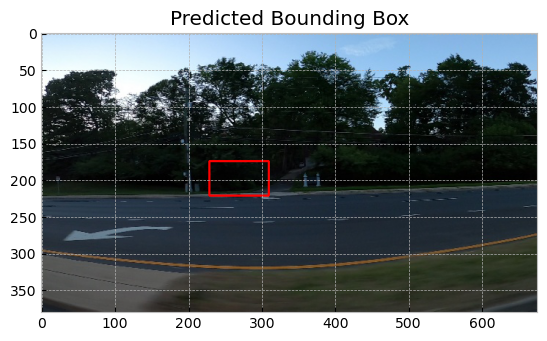

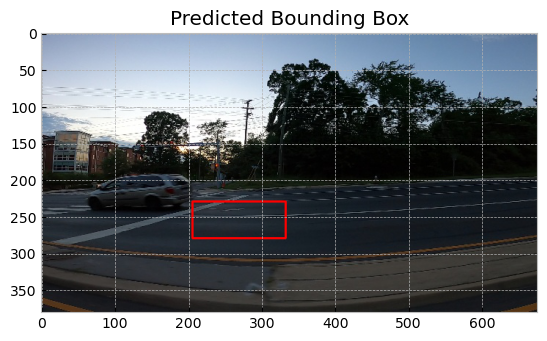

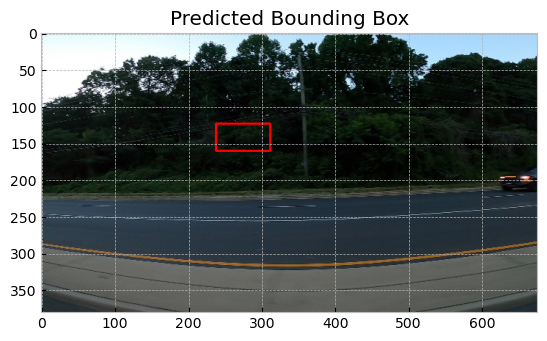

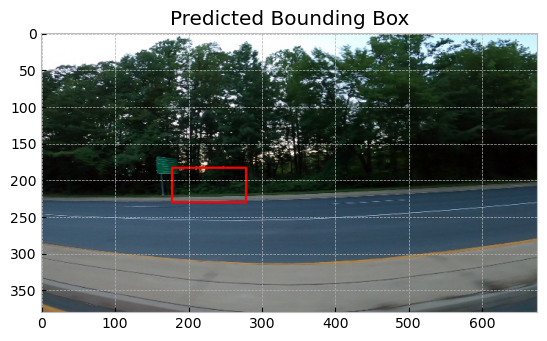

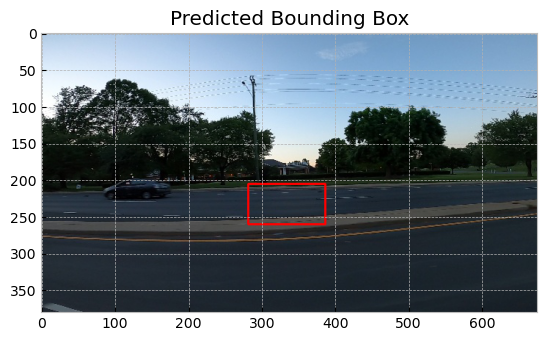

In [14]:
# Display Results for Car Detection

for i in range(5):  # Visualize first 5 test images
    image = (X_test_car[i] * 255).astype(np.uint8)
    xmin, ymin, xmax, ymax = car_preds[i]
    image_with_box = cv2.rectangle(image.copy(),
                                   (int(xmin), int(ymin)),
                                   (int(xmax), int(ymax)),
                                   (255, 0, 0), 2)
    plt.imshow(image_with_box)
    plt.title("Predicted Bounding Box")
    plt.show()

In [15]:
# Load Car Training History

car_history = np.load('car_detection_dataset/car_training_history.npy', allow_pickle=True).item()

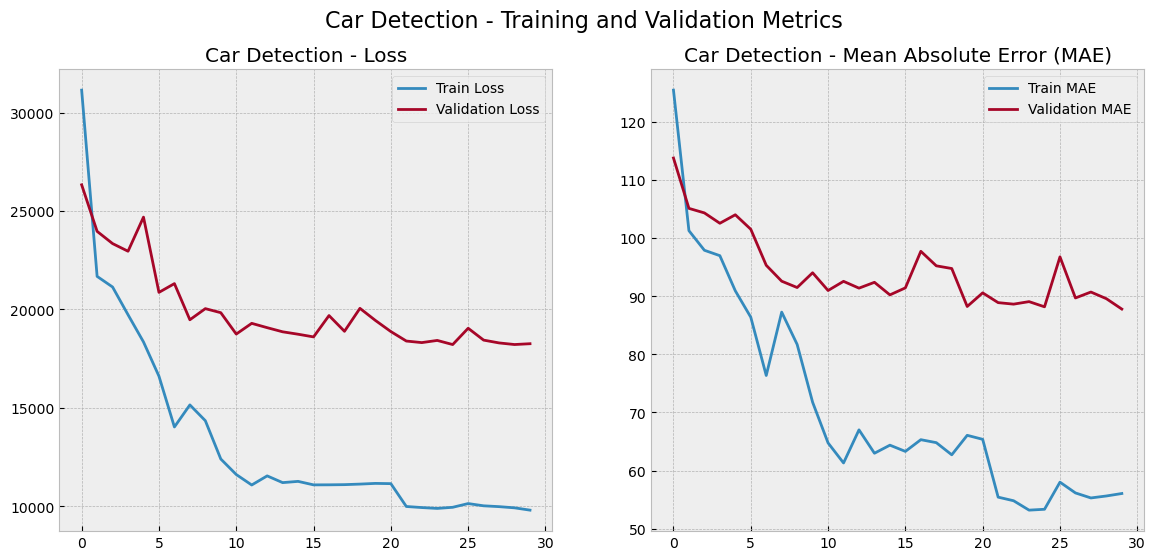

In [16]:
# Plot Training Results

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(car_history['loss'], label='Train Loss')
plt.plot(car_history['val_loss'], label='Validation Loss')
plt.title('Car Detection - Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(car_history['mae'], label='Train MAE')
plt.plot(car_history['val_mae'], label='Validation MAE')
plt.title('Car Detection - Mean Absolute Error (MAE)')
plt.legend()
plt.suptitle('Car Detection - Training and Validation Metrics', fontsize=16)
plt.show()